<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<h2 align=center>SHIPPING PROCESS ANALYSIS</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Task 2: Univariate & Multivariate Analysis: SHIPPING PROCESS

In [22]:
df = pd.read_csv('../DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### a) DAYS OF SHIPPING

##### Min/Max days for shipping (scheduled):

In [12]:
df['Days for shipment (scheduled)'].min()

0

In [13]:
df['Days for shipment (scheduled)'].max()

4

<AxesSubplot:ylabel='Days for shipment (scheduled)'>

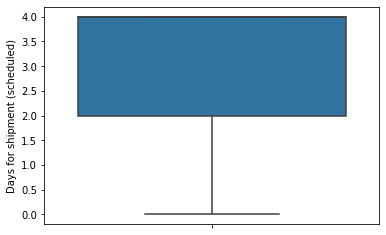

In [14]:
sns.boxplot( y=df['Days for shipment (scheduled)'])

##### Min/Max days for shipping (real):

In [15]:
df['Days for shipping (real)'].min()

0

In [16]:
df['Days for shipping (real)'].max()

6

<AxesSubplot:ylabel='Days for shipping (real)'>

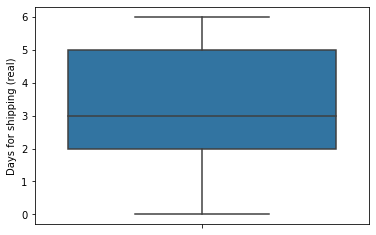

In [17]:
sns.boxplot( y=df['Days for shipping (real)'])

Text(0.5, 1.0, 'Min/Max days for shipment - Real vs. Scheduled')

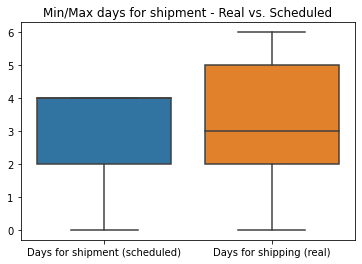

In [24]:
df_shipmentdays = df[['Days for shipment (scheduled)','Days for shipping (real)']]
sns.boxplot( data=df_shipmentdays)
plt.title('Min/Max days for shipment - Real vs. Scheduled')

##### Analize the differences between the schedule shipping and the real shipping:

##### Which is the standard deviation of each shipment?

In [3]:
df[['Days for shipping (real)','Days for shipment (scheduled)']].std()

Days for shipping (real)         1.623722
Days for shipment (scheduled)    1.374449
dtype: float64

##### Is the shipping usually underforecast or overforecast?

In [7]:
# Mean Bias Error / Mean Deviation

def mean_bias_error(true, pred):
    bias_error = true - pred
    mbe_loss = np.mean(np.sum(bias_error) / true.size)
    return mbe_loss

mean_bias_error(df['Days for shipping (real)'],df['Days for shipment (scheduled)'])


0.5658074773292562

Note: A positive bias means the error from the data is overestimated.

##### Metrics of performance (Predictive Model):

To asses the performance of the predictive forecast we will obtain some metrics that evaluate the performance of the model.

In [4]:
# MAD / MAE - mean_absolute_error(true, predicted)

from sklearn.metrics import mean_absolute_error

mean_absolute_error(df['Days for shipping (real)'],df['Days for shipment (scheduled)'])

1.2863078124740333

In [6]:
# MAPE - mean_absolute_percentage_error(true, predicted)

from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(df['Days for shipping (real)'],df['Days for shipment (scheduled)'])

0.4080608320084497

In [5]:
# MSE - mean_squarred_error(true, predicted)

from sklearn.metrics import mean_squared_error

mean_squared_error(df['Days for shipping (real)'],df['Days for shipment (scheduled)'])

2.543106265822434

In [5]:
# RMSE - (Root) mean_squarred_error(true, predicted)

from sklearn.metrics import mean_squared_error

mean_squared_error(df['Days for shipping (real)'],df['Days for shipment (scheduled)'], squared=False)

1.5947119695488694

### b) DELIVERY STATUS

##### How is the Delivery Status today?

In [412]:
df.groupby('Delivery Status').size().sort_values(ascending=False)

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
dtype: int64

##### What is the percentage of canceled shipments?

In [413]:
round(((df.groupby('Delivery Status').size()['Shipping canceled'])*100)/len(df),2)

4.3

##### Are the canceled shipments related to a certain product?

In [34]:
df_canceled = df[df['Delivery Status'] == 'Shipping canceled']['Product Name'].value_counts().to_frame()
df_canceled['Percentage'] = df_canceled['Product Name'] * 100 / df_canceled['Product Name'].sum()
df_canceled.head(10)

,Product Name,Percentage
Perfect Fitness Perfect Rip Deck,1037,13.373743
Nike Men's CJ Elite 2 TD Football Cleat,983,12.677328
Nike Men's Dri-FIT Victory Golf Polo,919,11.851947
O'Brien Men's Neoprene Life Vest,828,10.678360
Field & Stream Sportsman 16 Gun Fire Safe,730,9.414496
Pelican Sunstream 100 Kayak,660,8.511736
Diamondback Women's Serene Classic Comfort Bi,572,7.376838
Nike Men's Free 5.0+ Running Shoe,523,6.744906
Under Armour Girls' Toddler Spine Surge Runni,453,5.842146
Fighting video games,34,0.438483


### c) LATE DELIVERY RISK

##### How many orders have late delivery risk? (1 = late delivery risk, 0 = no late delivery risk)

In [37]:
# 1 is late delivery risk
df_laterisk = df['Late_delivery_risk'].value_counts().to_frame()
df_laterisk['Percentage'] = round(df_laterisk['Late_delivery_risk'] * 100 / df_laterisk['Late_delivery_risk'].sum(),2)
df_laterisk

,Late_delivery_risk,Percentage
1,98977,54.83
0,81542,45.17


##### Is the late delivery risk related to a certain market?

In [283]:
# 1 is late delivery risk
df_lateriskmark = df.groupby(['Market','Late_delivery_risk']).size().to_frame(name='Total Orders')
df_lateriskmark['Percent'] = df_lateriskmark.groupby(level=0).transform(lambda x: (x *100 / x.sum()).round(2))
df_lateriskmark

Total Orders  Percent
Market       Late_delivery_risk                       
Africa       0                           5274    45.41
             1                           6340    54.59
Europe       0                          22509    44.79
             1                          27743    55.21
LATAM        0                          23550    45.64
             1                          28044    54.36
Pacific Asia 0                          18548    44.95
             1                          22712    55.05
USCA         0                          11661    45.20
             1                          14138    54.80

##### Is the late delivery risk related to a certain product?

In [289]:
df_lateriskprod = df.groupby(['Product Name','Late_delivery_risk']).size().to_frame(name='Total Orders')
df_lateriskprod['Percent'] = df_lateriskprod.groupby(level=0).transform(lambda x: (x *100 / x.sum()).round(2))
df_lateriskprod = df_lateriskprod.reset_index()
df_lateriskprod[df_lateriskprod['Late_delivery_risk'] == 1].sort_values(by='Percent',ascending=False).set_index(['Product Name', 'Late_delivery_risk']).head(30)

,,Total Orders,Percent
Product Name,Late_delivery_risk,,
SOLE E25 Elliptical,1,7,70.00
Ogio Race Golf Shoes,1,42,68.85
GoPro HERO3+ Black Edition Camera,1,21,65.62
Total Gym 1400,1,23,63.89
Titleist Small Wheeled Travel Cover,1,34,62.96
Team Golf St. Louis Cardinals Putter Grip,1,197,62.94
Pelican Maverick 100X Kayak,1,25,62.50
Diamondback Boys' Insight 24 Performance Hybr,1,18,62.07
Titleist Club Glove Travel Cover,1,21,61.76


### d) MARKETS

##### Which markets exist and which is the main one?

In [42]:
df['Market'].value_counts().sort_values(ascending=False)

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

##### Which regions exist and which is the main one?

In [101]:
df['Order Region'].value_counts().sort_values(ascending=False)

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

##### Which are the real days for shipping to each market?
(Big differences in the shipping days can show us which markets are closer and which are further away)

In [90]:
df.groupby('Market').mean()['Days for shipping (real)'].sort_values(ascending=False).to_frame()

,Days for shipping (real)
Market,
Africa,3.511193
LATAM,3.508567
Pacific Asia,3.500509
Europe,3.487622
USCA,3.484709


##### Which markets have the biggest delays? 
(Real shipping - Scheduled shipping) > 0 )

In [100]:
df_delaydays = df[['Days for shipping (real)','Days for shipment (scheduled)','Market']]
df_delaydays['Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df_delaydays[df_delaydays['Delay'] >0].groupby('Market').mean().sort_values(by='Delay',ascending=False)['Delay'].to_frame()

<ipython-input-100-089e81546aba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delaydays['Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']


,Delay
Market,
Pacific Asia,1.621844
USCA,1.617200
Europe,1.616510
LATAM,1.616010
Africa,1.601697


##### Market and regions with more orders (Multiindex Market-Region)

In [278]:
# 1) Create table / 2) Sort Multiindex
df_regions = df.groupby(['Market','Order Region']).size()
df_regions.reset_index(name='Total Orders').groupby('Market').apply(lambda g: g.sort_values(by='Total Orders',ascending=False)).set_index(['Market', 'Order Region'])

Total Orders
Market       Order Region                 
Africa       West Africa              3696
             North Africa             3232
             East Africa              1852
             Central Africa           1677
             Southern Africa          1157
Europe       Western Europe          27109
             Northern Europe          9792
             Southern Europe          9431
             Eastern Europe           3920
LATAM        Central America         28341
             South America           14935
             Caribbean                8318
Pacific Asia Oceania                 10148
             Southeast Asia           9539
             South Asia               7731
             Eastern Asia             7280
             West Asia                6009
             Central Asia              553
USCA         West of USA              7993
             East of USA              6915
             US Center                5887
             South of  USA            4045
             Canada                    959

##### Which is the market with the higher sales?

In [181]:
#value = 13258965
#f'{value:,}'
#'{:,}'.format(value)
# To change the style of a unique number

#astype('int64') Change the cientific notation to an integer
#style.format('{:,}') Change the style of the numbers in the column in a DF 
df.groupby('Market').sum().sort_values(by='Sales',ascending=False)['Sales'].astype('int64').to_frame().style.format('{:,}')


,Sales
Market,
Europe,"10,872,396"
LATAM,"10,277,612"
Pacific Asia,"8,273,743"
USCA,"5,066,528"
Africa,"2,294,452"


##### Average order sale per market:

<AxesSubplot:xlabel='Market', ylabel='Sales'>

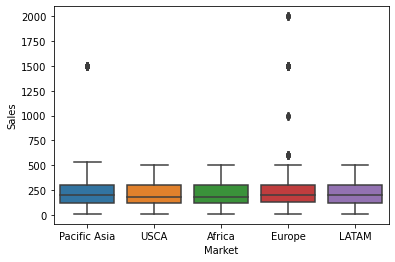

In [5]:
sns.boxplot(x= df['Market'], y=df['Sales'])

##### Which is the market with the highest profit?

In [11]:
df_posprofit = df[df['Order Profit Per Order'] > 0]
df_posprofit = df_posprofit.groupby('Market').sum().sort_values(by='Order Profit Per Order',ascending=False)['Order Profit Per Order'].map('{:,.2f}'.format)
df_posprofit.to_frame(name='Total profit in USD')

,Total profit in USD
Market,
Europe,"2,316,679.10"
LATAM,"2,201,487.68"
Pacific Asia,"1,750,765.37"
USCA,"1,093,505.81"
Africa,"488,012.36"


### e) TIME

##### What is the frequency of the shipping orders? (amount of orders daily)

In [14]:
# Column of Shipping date is a string. 
# If format of Date/Hour in the cell = Datetime, pass the column directly to datetime with to_datetime(df['...'])
# If format is diff. from datetime, then we need to instruct how to take the format and transform it to datetime
# Ex. to_datetime(df['...'], format = '%Y-%m-%d %I-%p')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [15]:
type(df['shipping date (DateOrders)'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='shipping date (DateOrders)'>

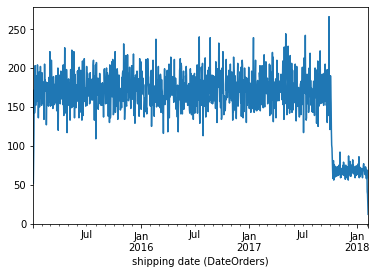

In [16]:
df_dailyfreq = df.set_index('shipping date (DateOrders)')
df_dailyfreq.resample('D').size().plot()

Text(0.5, 1.0, 'Frequency of Shipments in 2015')

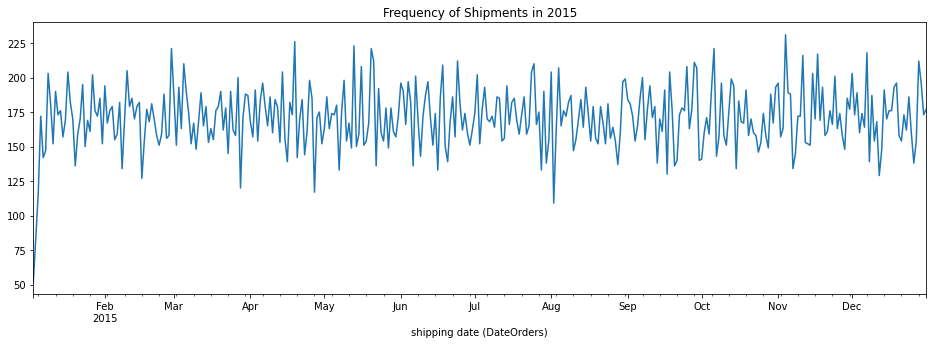

In [32]:
df_dailyfreq.resample('D').size()['2015'].plot(figsize = (16,5))
plt.title('Frequency of Shipments in 2015')

Text(0.5, 1.0, 'Frequency of Shipments in 2016')

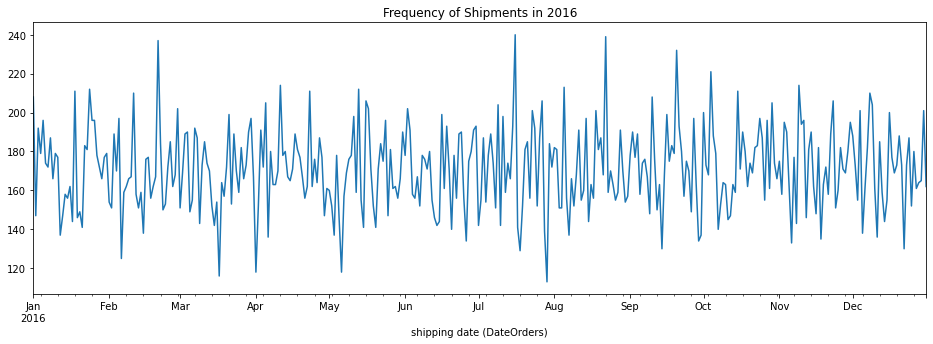

In [33]:
df_dailyfreq.resample('D').size()['2016'].plot(figsize = (16,5))
plt.title('Frequency of Shipments in 2016')

Text(0.5, 1.0, 'Frequency of Shipments in 2017')

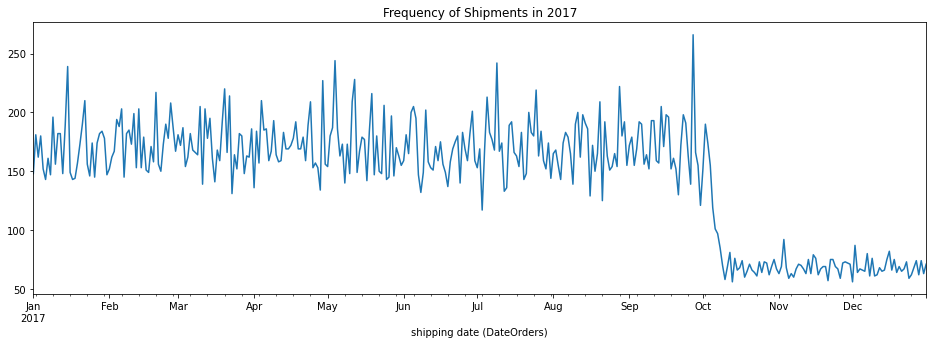

In [34]:
df_dailyfreq.resample('D').size()['2017'].plot(figsize = (16,5))
plt.title('Frequency of Shipments in 2017')

##### Shipping date (weekly), is there a particular week where the sales increases? (Compare years 2015-2016-2017)

In [18]:
#SALES PER WEEK COMPARING YEARS
df_weeksales = df.set_index('shipping date (DateOrders)')
df_week2015 = df_weeksales.resample('W').sum()['Sales']['2015'].reset_index()
df_week2015.drop('shipping date (DateOrders)',axis=1,inplace=True)
df_week2015.columns = df_week2015.columns.str.replace('Sales','Sales 2015') 
df_week2016 = df_weeksales.resample('W').sum()['Sales']['2016'].reset_index()
df_week2016.drop('shipping date (DateOrders)',axis=1,inplace=True)
df_week2016.columns = df_week2016.columns.str.replace('Sales','Sales 2016')
df_week2017 = df_weeksales.resample('W').sum()['Sales']['2017'].reset_index()
df_week2017.reset_index().drop(52,axis=0,inplace=True)
df_week2017.drop('shipping date (DateOrders)',axis=1,inplace=True)
df_week2017.columns = df_week2017.columns.str.replace('Sales','Sales 2017')

In [19]:
df_week2017

,Sales 2017
0,237492.454470
1,226483.654593
2,252549.475036
3,232045.234487
4,231520.864492
5,236294.304467
6,257082.224801
7,234073.924641
8,257717.404621
9,236351.804661


In [20]:
df_weeksalesyearly = pd.concat([df_week2015,df_week2016,df_week2017],axis=1)
df_weeksalesyearly

,Sales 2015,Sales 2016,Sales 2017
0,28183.540517,255377.845068,237492.454470
1,216197.064268,243240.154580,226483.654593
2,251861.874771,214519.364229,252549.475036
3,227802.554432,248146.935005,232045.234487
4,244746.544610,242889.024706,231520.864492
5,220804.274438,225658.724496,236294.304467
6,243000.554871,232380.984459,257082.224801
7,226391.984305,237284.774554,234073.924641
8,245126.864678,236461.244621,257717.404621
9,234669.144581,233647.664749,236351.804661


<AxesSubplot:>

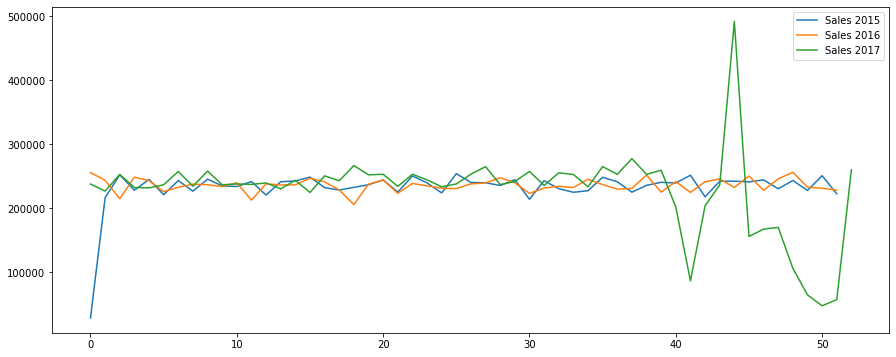

In [408]:
df_weeksalesyearly.plot(figsize=(15,6))

<AxesSubplot:>

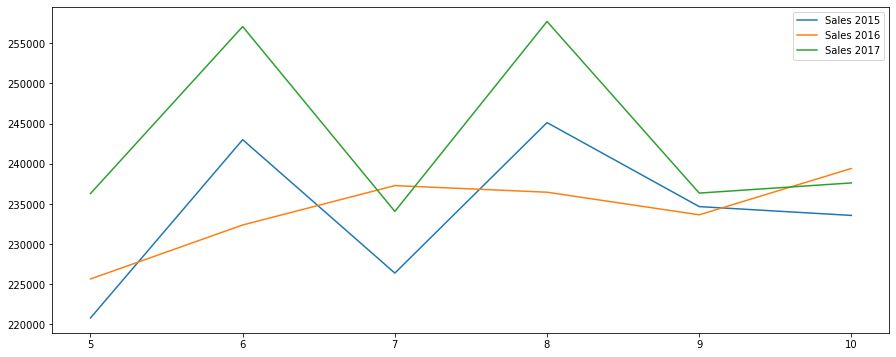

In [409]:
df_weeksalesyearly.iloc[5:11].plot(figsize=(15,6))

<AxesSubplot:>

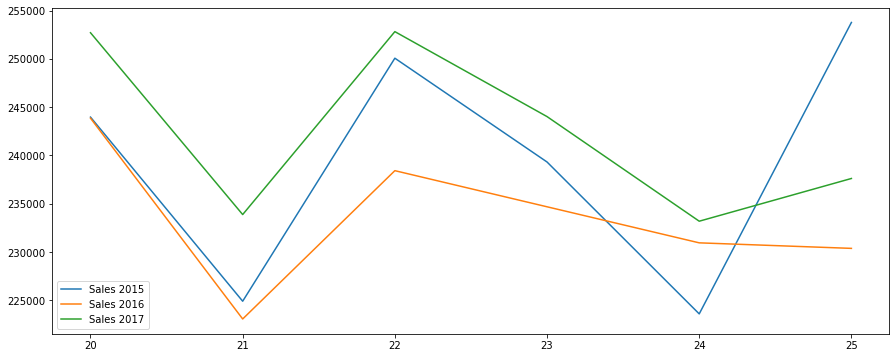

In [410]:
df_weeksalesyearly.iloc[20:26].plot(figsize=(15,6))

<AxesSubplot:>

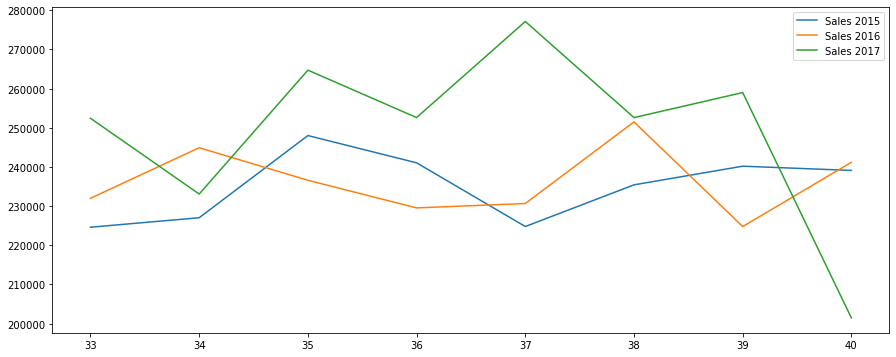

In [411]:
df_weeksalesyearly.iloc[33:41].plot(figsize=(15,6))

### f) SHIPPING MODES

##### Which are the shipping modes and which is the main one?

In [414]:
df_shipmodes = df['Shipping Mode'].value_counts().sort_values(ascending=False)
df_shipmodes

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

Text(0.5, 1.0, 'Main shipping modes in all the Dataset orders')

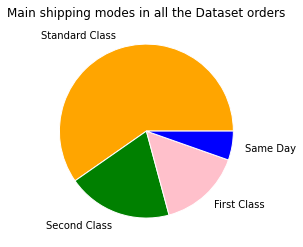

In [419]:
plt.pie(df_shipmodes, labels=df_shipmodes.index, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors= ('orange','green','pink','blue'))
plt.title('Main shipping modes in all the Dataset orders')

##### Is same day delivery the most used shipping mode in the different markets?

In [273]:
df_markship = df.groupby(['Market','Shipping Mode']).size().to_frame(name='Total Orders')
df_markship['Percent'] = df_markship.groupby(level=0).transform(lambda x: (x *100 / x.sum()).round(2))
df_markshipdf_markship.reset_index().groupby('Market').apply(lambda s: s.sort_values(by='Percent',ascending=False)).set_index(['Market', 'Shipping Mode'])
df_markship
#df['Shipping Mode'].value_counts().sort_values(ascending=False)

Total Orders  Percent
Market       Shipping Mode                        
Africa       Standard Class          7055    60.75
             Second Class            2164    18.63
             First Class             1727    14.87
             Same Day                 668     5.75
Europe       Standard Class         29740    59.18
             Second Class            9861    19.62
             First Class             7892    15.70
             Same Day                2759     5.49
LATAM        Standard Class         31119    60.32
             Second Class            9939    19.26
             First Class             7886    15.28
             Same Day                2650     5.14
Pacific Asia Standard Class         24586    59.59
             Second Class            8147    19.75
             First Class             6301    15.27
             Same Day                2226     5.40
USCA         Standard Class         15252    59.12
             Second Class            5105    19.79
             First Class             4008    15.54
             Same Day                1434     5.56

##### CONCLUSION:

a) Days of shipping

* The schedule days of shipping vary between 0 and 4 days. On the other hand the real days for shipping vay between 0 and 6 days.

* The mean deviation or mean bias error is a positive number, resulting in an overestimation in the forecast. 


b) Delivery Status

* The delivery status shows the majority of orders with "late delivery". The rest of the catogories in descendent order are "advance shipping", "shipping on time", "shipping canceled".

* A total  of 4.3% of shipments have been canceled. 

* To understand if the cancelled orders were related to a certain products we checked which were the products among this orders. We found that almost 58% of the cancelled orders corresponde to 5 products: Perfect fitness rip deck, Nike Mens CJ Elite Football cleat, Nike Men's Dri Fit Golf Polo, O'Brien Life Vest and Sportsman 16 gun fire safe. 

c) Late delivery risk

* 54,8% of the orders present a late delivery risk.

* To know if the late delivery risk was related to a certain market, we check the percentage of the risk among the orders in each market. As a result we obtained that around 54/55 % in all markets has a late delivery risk. So the risk doesn't depend of a certain market.

* We also wanted to investigate if the late risk was related to a certain product. We found that there were products with a risk of 60/70% of late delivery. So the late delivery seems to be more frequent in certain specific products. 

d) Market

* There are 5 markets: LATAM, Europe, Pacific Asia, USCA, Africa. LATAM is the market that has more orders.

* There are 23 regions inside those 5 markets. The biggest regions in number of orders are Central America, Western Europe and South America.

* The mean of shipping days (real days) is among 3,4 and 3.5 days. Meaning there aren't closer or further markets. Probably the company has the factories or distribution centers placed globally strategically to have a similar shipping time. 

* To find out the market that has the biggest delays we got the delays between the forecast and the real time it took to delivery the goods. The mean of this delay was very similar among the markets, resulting the biggest in 1.62 days of delay for Pacific Asia and the lowest for in 1.60 days for Africa.

* The market with higher sales is Europe with 10 million USD in sales, followed bu LATAM and Pacific Asia.

* The average order sale per market is between 0 and 500 USD (in all the markets) with a mean a little less than 250 USD. Europe is the main market that presents outliers outer of this ranges. 

* The market with the highest profit is Europe with 2 million USD, followed by LATAM and Pacific Asia. 

e) Time

* With the date of the orders we were able to graph this data in a historic frequency of orders plot. The goal was to identify trends of certain months or years. Something that stood out was that in October 2017 something made the orders to reduce drastically and continue with a lower number of orders (compared to previous years).

* Also we analice the orders per week and we compared the years 2015, 2016, 2017 overlapping the orders of each year. There are some weeks were we can see an increase among the years:
	* Week 6 (contains Valentine's day)
	* Week 8 (22 to 28 February)
	* Week 22 (31 May to 06 June)
	* Week 35 (contains labor day)

f) Shipping Modes

* There are four modes of shipping: Standard Class, Second Class, First Class and Same Day. The most used among the orders is Standard Class.

* We wanted to know if the same day delivery was one of the most used shipping modes in the different markets. But in all the markets "same day delivery" only represents 5% of the orders.